In [50]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error


In [51]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv("carpricedata.csv")

# Chia CarName thành brand và model
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df = df.drop(columns=['car_ID', 'CarName'])

# Cột dữ liệu phân loại
categorical_column = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem','brand','model'] 

# Cột dữ liệu liên tục
numerical_column = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight', 'enginesize', 'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

# Mã hóa dữ liệu phân loại
df = pd.get_dummies(df, columns=categorical_column, drop_first=True)

# Tách biến độc lập (X) và biến phụ thuộc (y)
X = df.drop('price', axis=1).astype(float)
y = df['price'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

# Thêm cột hằng số vào X_train và X_test
ones_train = np.ones((X_train.shape[0], 1))
ones_test = np.ones((X_test.shape[0], 1))
Xbar_train = np.concatenate((ones_train, X_train), axis=1)
Xbar_test = np.concatenate((ones_test, X_test), axis=1)


A = np.dot(Xbar_train.T, Xbar_train) 
b = np.dot(Xbar_train.T, y_train)
w = np.dot(np.linalg.pinv(A), b)

# Dự đoán trên tập kiểm tra
y_pred = np.dot(Xbar_test, w)

# Tạo DataFrame để so sánh
pred_df = pd.DataFrame({'Giá trị thực tế': y_test, 'Giá trị dự đoán': y_pred, 'Sai lệch': y_test - y_pred})

print(pred_df)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')


    Giá trị thực tế  Giá trị dự đoán      Sai lệch
0         30760.000     22909.402534   7850.597466
1         17859.167     20251.580670  -2392.413670
2          9549.000     11068.013222  -1519.013222
3         11850.000      7686.509206   4163.490794
4         28248.000     27475.954932    772.045068
5          7799.000      4875.664848   2923.335152
6          7788.000      8821.019813  -1033.019813
7          9258.000      9198.041265     59.958735
8         10198.000      9558.984335    639.015665
9          7775.000     11438.306121  -3663.306121
10        13295.000     13471.149160   -176.149160
11         8238.000      4441.400059   3796.599941
12        18280.000     15463.420146   2816.579854
13         9988.000      8329.461879   1658.538121
14        40960.000     38884.995779   2075.004221
15         6488.000      8498.802847  -2010.802847
16         5151.000     -4063.739696   9214.739696
17        12629.000     13185.885325   -556.885325
18         8189.000     11412.6

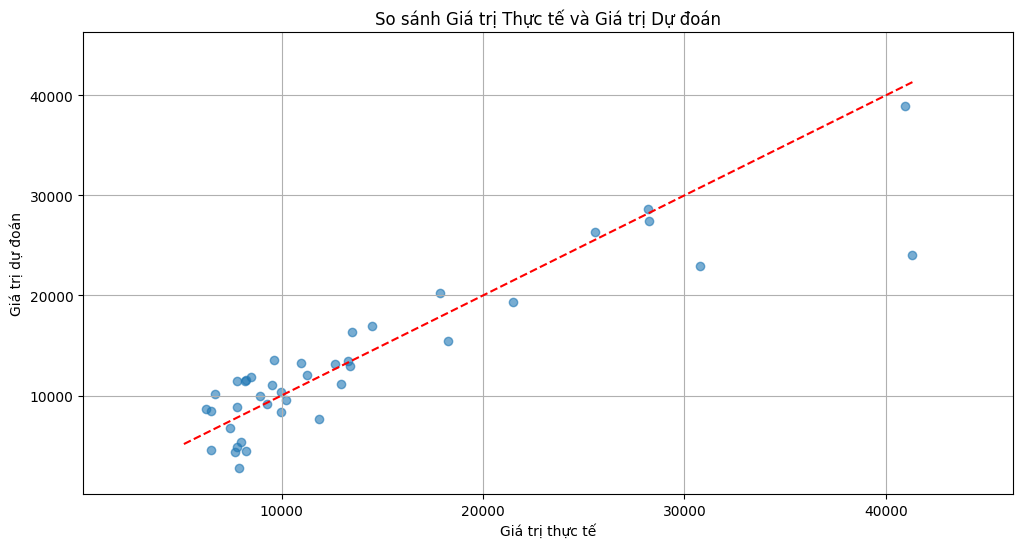

In [52]:
import matplotlib.pyplot as plt

# Vẽ đồ thị
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Đường chuẩn
plt.title('So sánh Giá trị Thực tế và Giá trị Dự đoán')
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.grid()
plt.xlim(y_test.min() - 5000, y_test.max() + 5000)  # Điều chỉnh giới hạn trục x
plt.ylim(y_test.min() - 5000, y_test.max() + 5000)  # Điều chỉnh giới hạn trục y
plt.show()